# Access Not Found: Anomaly Detection Project

## Goal: 
* The project goal is to detect outliers on the curriculum logs, providing insights via email to the boss for the board meeting on Friday morning. 
* This analysis aims to address the listed questions and uncover any additional important findings related to the observed counts data.

## Imports

In [1]:
#.py modules
import wrangle as wr
import explore as ex

#numbers
import pandas as pd
import numpy as np

#vizzes
import matplotlib.pyplot as plt
import seaborn as sns

Imports Successful


> # `Wrangle`

### Acquire
* Data acquired from MySql Server using env.py credentials
* Joined logs and cohorts tables then pulled into jupyter lab environment and created a CSV
* 847330 rows × 15 columns *before* cleaning
* 847330 rows × 14 columns *after* cleaning

### Prepare
* Prepare
    * dropped columns
        * id, slack, deleted_at, date, time
    * renamed columns
        * name to cohort
        * created_at to created
        * updated_at to updated
    * changed dates to datetime type
    * created new columns
        * program name by mapping program_id
            * 1 = data science
            * 2&3 = web dev
            * 4 = cloud
        * date and time combined into one column and renamed to access_dates
        * lesson column
        * endpoint column
    * no nulls

### Data Dictionary

| Feature | Definition|
|:--------|:-----------|
|date| Access date of the user|
|time| Access time of the user|
|path| User pathway|   
|user_id| Specific user id per cohort|    
|cohort_id| Specific cohort id|   
|ip| IP address of the user|
|name| Cohort Name|   
|start_date| Start_date for the user|
|end_date| End_date for the user|
|created_at| Date and time of account creation|
|updated_at| Date and time of last update|
|program_id| Specific id for each program offered|

In [2]:
# # acquiring data
df= wr.get_logs('logs.csv')

# # cleaning data and saving to a clean df
df =wr.prep_logs(df)

In [3]:
# quick data viz
df.head()

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created,updated,program_id,access_date,program,lesson,endpoint
0,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:55:03,web dev,,
1,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:56:02,web dev,NaN,java-ii
2,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:56:05,web dev,java-ii,object-oriented-programming
3,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:56:06,web dev,slides,object_oriented_programming
4,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,2018-01-26 09:56:24,web dev,javascript-i,conditionals


In [4]:
# data stats viz
df.describe()

,user_id,cohort_id,program_id
count,847330.000000,847330.000000,847330.000000
mean,456.707344,48.501049,2.086004
std,250.734201,32.795482,0.388231
min,1.000000,1.000000,1.000000
25%,263.000000,28.000000,2.000000
50%,476.000000,33.000000,2.000000
75%,648.000000,57.000000,2.000000
max,981.000000,139.000000,4.000000


> # `Explore`

### Questions To Answer:
1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
4. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
5. Which lessons are least accessed?

## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

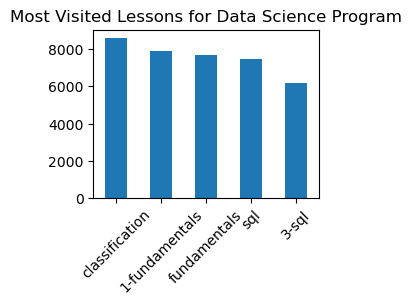

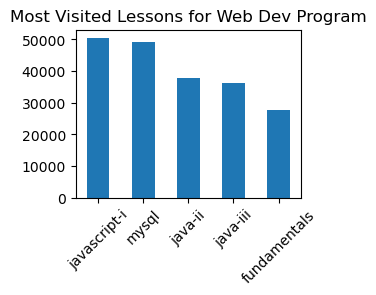

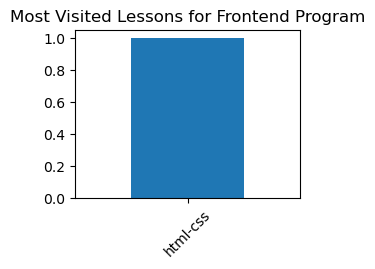

In [7]:
#visualize the most visited lessons per program
ex.plot_one(df)

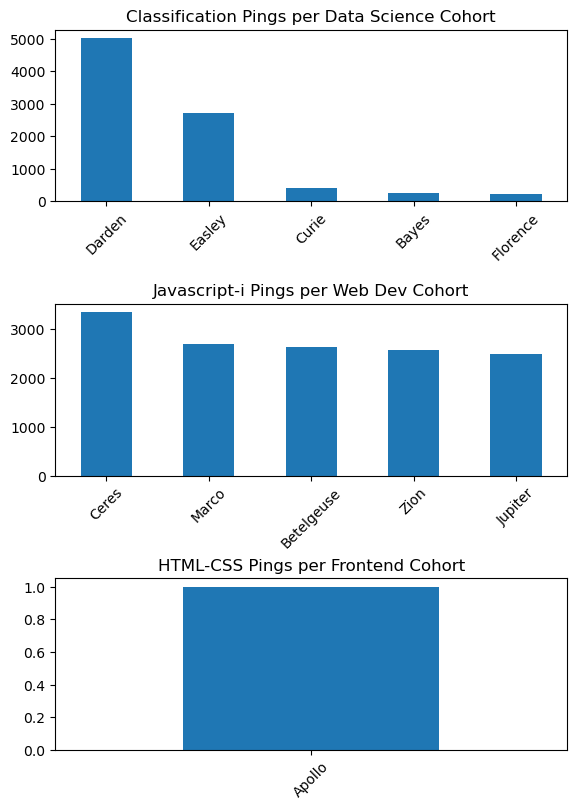

In [8]:
# visualize the top lesson per program per cohort
ex.plot_one_pings(df)

### Insight:
The most accessed lesson for data science is classification and the cohort who pinged the most was Darden.
<br>
The most accessed lesson for Web Development is Javascript-i and the cohort who pinged the most was Ceres.
<br>
The most accessed lesson for Frontend was HTML-CSS and the cohort who pinged the most was Apollo.

## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [10]:
#analyze 
observed_counts = df.groupby(['lesson', 'cohort']).size().unstack(fill_value=0)
outliers,non_outliers=ex.detect_outliers(observed_counts)

In [11]:
#visualize
outliers.sample(10)

cohort,Andromeda,Apex,Apollo,Arches,Badlands,Bash,Bayes,Betelgeuse,Ceres,Curie,...,Quincy,Sequoia,Staff,Teddy,Ulysses,Voyageurs,Wrangell,Xanadu,Yosemite,Zion
lesson,,,,,,,,,,,,,,,,,,,,,
css-ii,826,652,0,277,0,461,0,1019,1006,0,...,10,123,881,171,1002,934,1060,748,698,1172
mkdocs,0,0,0,56,0,0,1,0,0,0,...,8,168,0,595,721,245,18,0,0,0
java-ii,1486,2559,0,333,0,982,0,1930,2789,1,...,40,216,2962,1486,1518,2145,1249,1494,1088,2249
javascript-i,2052,2074,0,578,0,1526,1,2640,3342,0,...,22,332,2596,2235,2164,2257,2173,1996,1640,2570
html-css,792,697,1,313,3,412,10,1218,1447,0,...,37,280,1076,339,847,1013,880,1136,632,1132
javascript-ii,1041,1318,0,468,5,506,0,1362,1535,0,...,6,163,1657,1461,1171,1398,1044,1369,1164,1892
search,318,1497,0,45,0,660,588,761,1380,538,...,6,45,1349,103,142,328,504,577,361,700
bom-and-dom,372,582,0,163,0,305,1,640,850,0,...,1,113,708,560,419,544,585,471,352,898
classification,0,0,0,0,0,0,260,0,0,400,...,0,0,2829,2,0,0,0,0,0,0


In [12]:
#visualize
non_outliers.sample(10)

cohort,Andromeda,Apex,Apollo,Arches,Badlands,Bash,Bayes,Betelgeuse,Ceres,Curie,...,Quincy,Sequoia,Staff,Teddy,Ulysses,Voyageurs,Wrangell,Xanadu,Yosemite,Zion
lesson,,,,,,,,,,,,,,,,,,,,,
12-advanced-topics,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,0
nlp,0,0,0,0,0,0,38,0,0,161,...,0,0,258,0,0,0,0,0,0,0
Classification_DecisionTree_files,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
sequel-pro,0,0,0,6,0,0,0,0,0,0,...,3,0,3,0,0,0,0,0,0,0
img,1,0,0,0,0,0,0,1,0,0,...,0,0,4,0,0,1,3,0,0,3
intro-via-interactive-shell,4,0,0,0,3,0,0,15,1,0,...,0,0,3,19,31,8,4,2,12,0
1-overview,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
intruduction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Insight:
Cohorts Bayes and Curie show higher frequency of accessing lessons related to anomaly detection, NLP, 3-SQL, and Python, indicating their focus on data science.
<br>
Cohort Teddy demonstrates a higher frequency of accessing the mkdocs lesson compared to other cohorts.
<br>
Cohort Zion displays a significantly higher frequency of accessing the CSS-I lesson.
<br>
Interestingly, the Apex cohort shows a higher frequency of accessing the professional development lesson compared to other cohorts.
<br>
All cohorts appear to access the extra features and CSS lessons with similar frequency.

## 3. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [33]:
# 2018 accessed sites from web dev who are not staff
ex.web_2018(df)

inheritance.html            1
traversing.html             1
php                         1
codeup-exercises            1
tech-talk                   1
2-introduction-to-python    1
1-mysql-overview            1
3-tableau                   1
cssasxz                     1
quiz118                     1
Name: endpoint, dtype: int64


In [34]:
# 2019 accessed sites from web dev who are not staff
ex.web_2019(df)

creating-a-repository.html    1
bom.html                      1
tools                         1
notes                         1
0                             1
1                             1
..%5c                         1
..%255c                       1
%252e%252e%255c               1
job-search-workshop           1
Name: endpoint, dtype: int64


In [35]:
# 2020 accessed sites from web dev who are not staff
ex.web_2020(df)

inheritance.html            1
traversing.html             1
php                         1
codeup-exercises            1
tech-talk                   1
2-introduction-to-python    1
1-mysql-overview            1
3-tableau                   1
cssasxz                     1
quiz118                     1
Name: endpoint, dtype: int64


### Insight:
There is evidence of students accessing different materials during 2018-2020. 
<br>
There is a break in 2019 where the students seemed to stop accessing data science materials but this picked back up in 2020.
<br>
There are students accessing data science curriculum in 2020 supposedly *after* the access was restricted.
<br>

## 4. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [18]:
#analyze web dev program
grads_webdev = df[(df['end_date'] < df['access_date']) & (df['program'] == 'web dev')].groupby(['program', 'lesson']).size().sort_values(ascending=False)
grads_webdev.head(5)

program  lesson      
web dev                  14131
         fundamentals    11468
         mysql            8662
         javascript-i     8098
         java-ii          7510
dtype: int64

In [19]:
#analyze data science program
grads_ds = df[(df['end_date'] < df['access_date']) & (df['program'] == 'data science')].groupby(['program', 'lesson']).size().sort_values(ascending=False)
grads_ds.head(5)

program       lesson        
data science                    1446
              sql               1046
              classification    1036
              fundamentals       972
              python             615
dtype: int64

In [20]:
# analyze frontend program
grads_fend = df[(df['end_date'] < df['access_date']) & (df['program'] == 'frontend')].groupby(['program', 'lesson']).size().sort_values(ascending=False)
grads_fend

program   lesson  
frontend  content     2
                      1
          html-css    1
          images      1
dtype: int64

### Insight:
The top lessons accessed after graduation in the Web Development program include fundamentals, MySQL, and JavaScript I, II, and III.
<br>
In the Data Science program, the most frequently accessed lessons post-graduation are SQL, classification, fundamental, Python, and 3-SQL.
<br>
Limited traffic is observed in the front-end program for lessons such as HTML-CSS and images, with only a few log entries (1 or 2).
<br>
It appears that both the Web Development and Data Science programs prioritize reviewing fundamental and essential lessons covering the core topics of each program.

## 5. Which lessons are least accessed?

In [23]:
#analyze
least_lessons = df.groupby('lesson').size().sort_values(ascending=True)
least_lessons.head(20)

lesson
servlets                  1
style                     1
743                       1
882                       1
912                       1
918                       1
A-clustering              1
PreWork                   1
sgithubtudents            1
services                  1
b-clustering              1
bayes-capstones           1
requests-and-responses    1
quize                     1
capsones                  1
quic                      1
query                     1
project                   1
cls                       1
loops                     1
dtype: int64

### Insight:
Lessons such as using-files, intro-to-mysql, control-structures-ii, command-line, and PHP have relatively low student access rates.
<br>
This could be attributed to the fact that these lessons cover everyday practices that students are already familiar with and may not require frequent review, unlike more complex and less commonly used lessons.
<br>

> # `Conclusion`

## Explore

* Classification, javascript-i, and html-css are the top lessons per program offered. 
* Cohorts Bayes and Curie, specialized in data science, exhibit higher access frequencies for lessons on anomaly detection, NLP, 3-SQL, and Python. Cohort Teddy shows a distinct preference for the mkdocs lesson, while Cohort Zion demonstrates a significantly higher frequency for accessing CSS-I.
* The Apex cohort stands out by accessing the professional development lesson more frequently than other cohorts. Additionally, all cohorts show similar frequencies in accessing the extra features and CSS lessons.
* There are web dev students accessing data science materials into 2020, *after* access was restricted.
* The top lessons accessed after graduation in the Web Development program include fundamentals, MySQL, and JavaScript I, II, and III. In the Data Science program, frequently accessed post-graduation lessons are SQL, classification, fundamental, Python, and 3-SQL.
* Lessons like using-files, intro-to-mysql, control-structures-ii, command-line, and PHP have relatively low student access rates. This suggests that these lessons cover familiar everyday practices and may not require frequent review, unlike more complex and less commonly used lessons.

> # `Recommendations/Next Steps`

* The cohorts that pinged the most may have had some circumstances with the curriculum not work in their favor. I recommend working with the instructors to identify and remedy the possible confusion.
* For the third question my next steps would be to identify the students specifically that are accessing restricted materials to try to figure out how they did it and close the loop.
* We recommend maintaining graduates' access to the curriculum and implementing a system to send them notifications regarding significant updates. This approach ensures their ongoing engagement and keeps them up-to-date with the latest advancements in the curriculum.